# Exploration of customer purchasing behavior

In [1]:
# Import Dataset and useful libraries 
import os 
import pandas as pd 
os.chdir('../scripts/')
import utils as util 

source1 = "../../Data/sample_submission.csv"
source2 = "../../Data/store.csv"
source3 = "../../Data/test.csv"
source4 = "../../Data/train.csv"

sample_submission = util.read_csv_file(source1).get('data')
store = util.read_csv_file(source2).get('data')
test = util.read_csv_file(source3).get('data')
train = util.read_csv_file(source4).get('data')

c:\Users\Administrator\Documents\Projects\Tech company\TenX\projects\Rossmann_Pharmaceuticals_ML\src\scripts\utils.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


### Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique ID for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state **holidays**. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here

**CompetitionDistance** - the distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, or November of any given year for that store

In [2]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
test.head() 

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# Import ploting libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
# set the aesthetic theme of the plots 
sns.set_theme(style='whitegrid')

In [7]:
# Data Cleaning: Check for missing values and handle them 
missing_values = train.isnull().sum() 
print("missing value in training data: \n", missing_values[missing_values > 0])

missing value in training data: 
 Series([], dtype: int64)


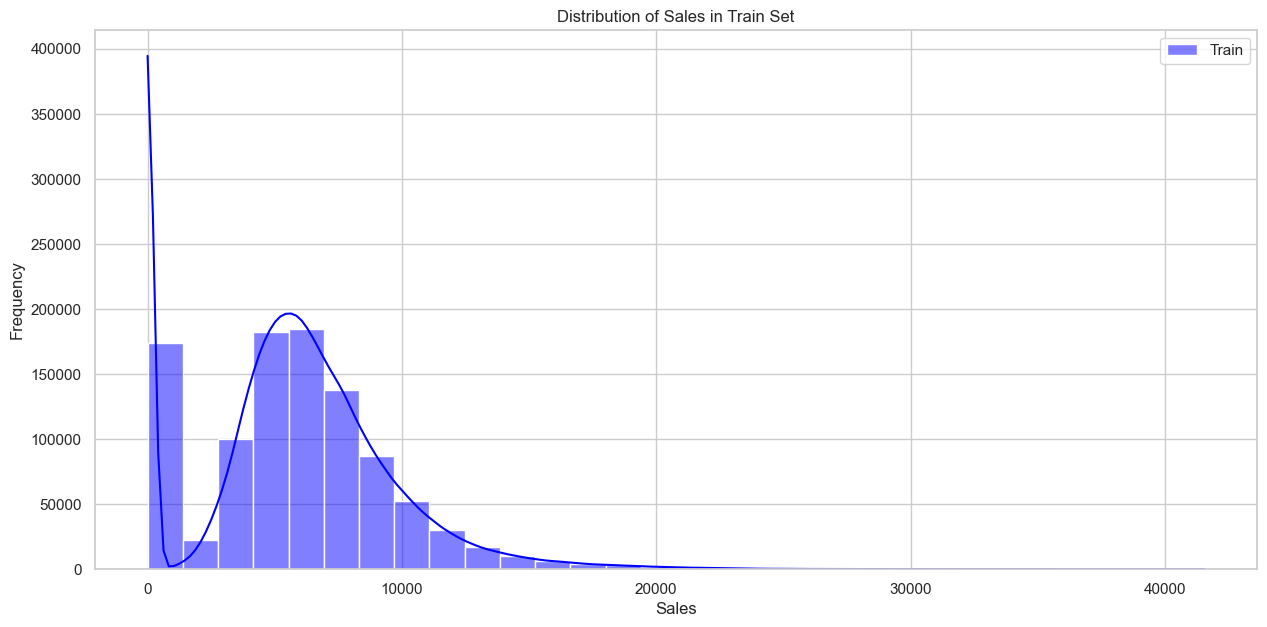

In [8]:
# 1. Distribution of Sales in Train set 
plt.figure(figsize=(15, 7))
sns.histplot(train['Sales'], bins=30, kde=True, color='blue', label='Train')
plt.title('Distribution of Sales in Train Set')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

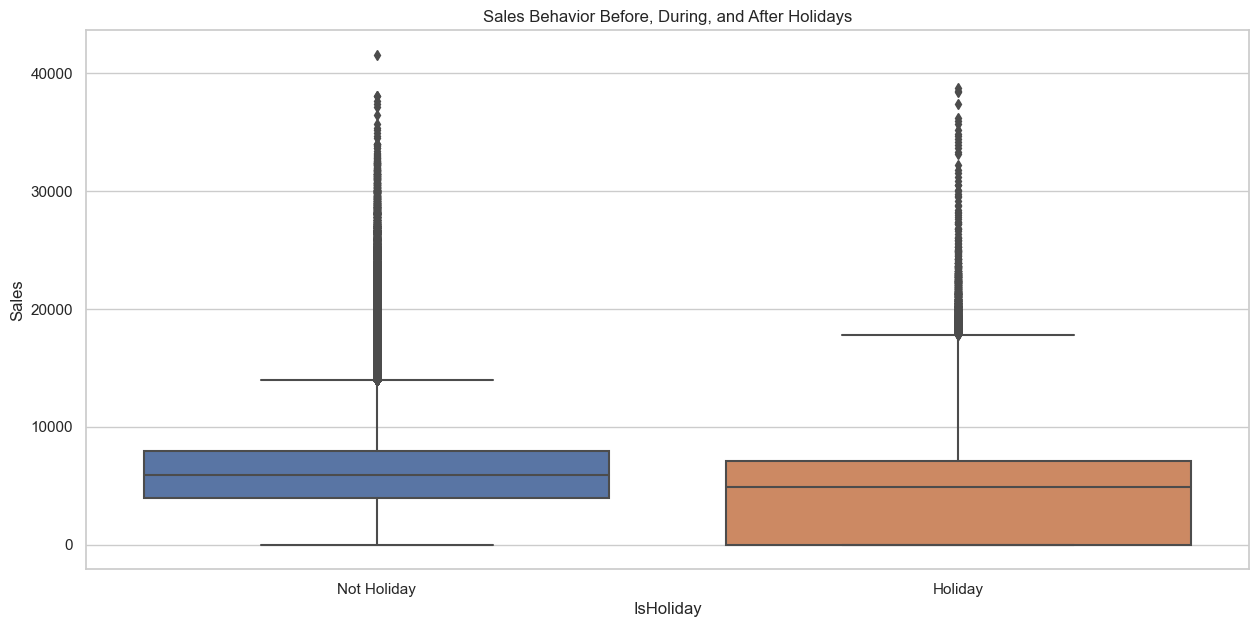

In [12]:
# 2. Sales Behavior Before, During, and After Holidays
train['Date'] = pd.to_datetime(train['Date'])
train['IsHoliday'] = train['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
plt.figure(figsize=(15,7))
sns.boxplot(x='IsHoliday', y='Sales', data=train)
plt.title('Sales Behavior Before, During, and After Holidays')
plt.xticks(ticks=[0, 1], labels=['Not Holiday', 'Holiday'])
plt.show()


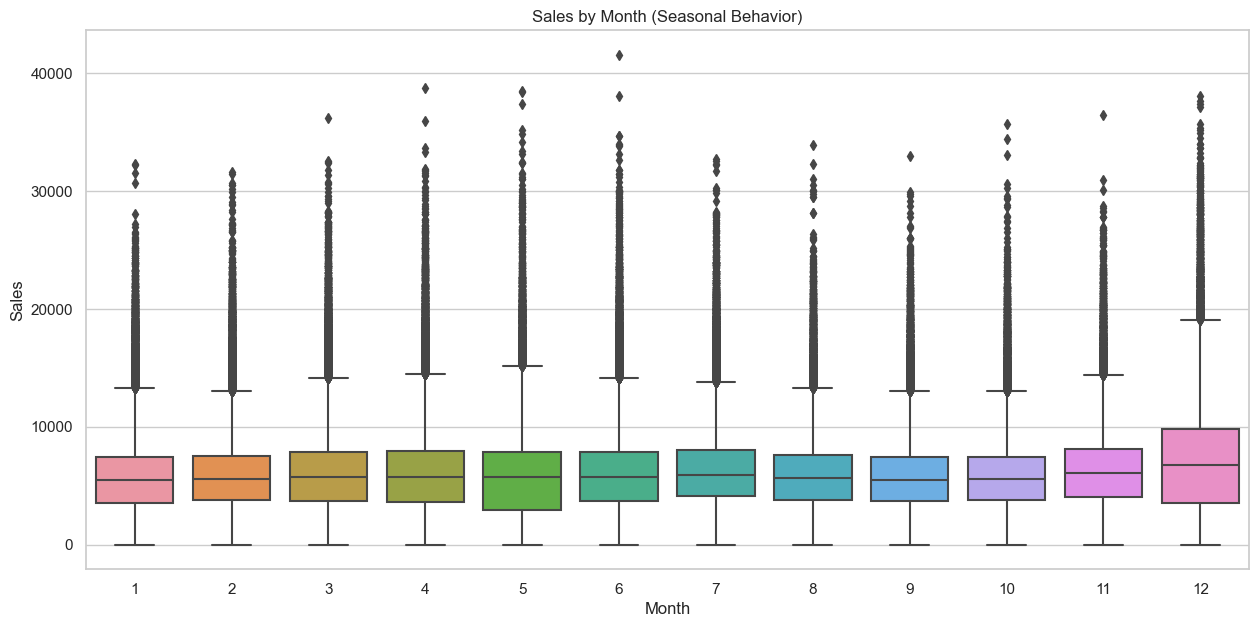

In [13]:
# 3. Seasonal Purchase Behaviors
train['Month'] = train['Date'].dt.month
plt.figure(figsize=(15, 7))
sns.boxplot(x='Month', y='Sales', data=train)
plt.title('Sales by Month (Seasonal Behavior)')
plt.show()

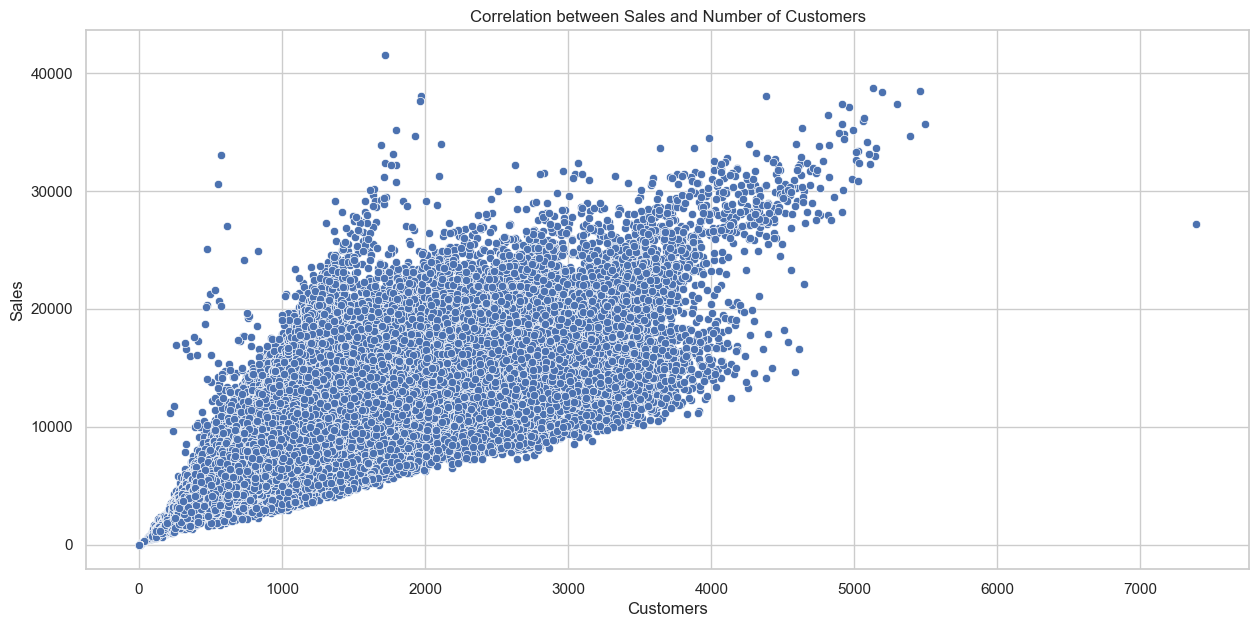

In [14]:
# 4. Correlation between Sales and Number of Customers
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Customers', y='Sales', data=train)
plt.title('Correlation between Sales and Number of Customers')
plt.show()

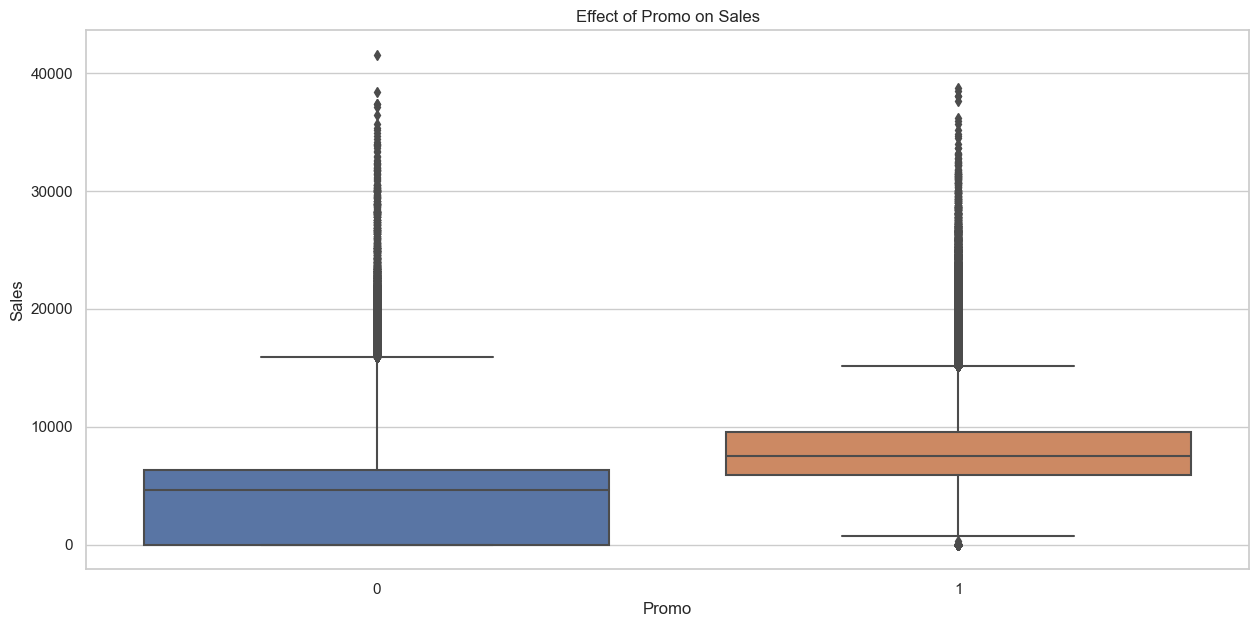

In [15]:
# 5. Effect of Promo on Sales
plt.figure(figsize=(15, 7))
sns.boxplot(x='Promo', y='Sales', data=train)
plt.title('Effect of Promo on Sales')
plt.show()
